In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Step 1: Review the Dataset and Identify Key Insights

In [2]:
# Load the dataset
data = pd.read_csv("Delinquency_prediction_dataset(1).csv")
data

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [19]:
# Copy of the original dataframe for imputation
df = data.copy()
df

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [20]:
# Show basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [21]:
df.shape

(500, 19)

#Step 2: Address Missing Data and Data Quality Issues

In [22]:
# Check missing values before treatment
missing_data = df.isnull().sum()
missing_data
print("Missing values before treatment:\n", missing_data)


Missing values before treatment:
 Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64


In [23]:
# Income: Median imputation to reduce outlier influence (Income is usually right-skewed)
df['Income'] = df['Income'].fillna(df['Income'].median())

In [24]:
# Loan_Balance: Also imputed using median for stability across wide loan ranges
df['Loan_Balance'] = df['Loan_Balance'].fillna(df['Loan_Balance'].median())


In [25]:
# Credit_Score: Only 2 missing values — impute using median to prevent bias or model complexity
df["Credit_Score"] = df["Credit_Score"].fillna(df["Credit_Score"].median())


In [26]:
# Check that all missing values are resolved
missing_after = df[['Income', 'Loan_Balance', 'Credit_Score']].isnull().sum()
print("\nMissing values after treatment:\n", missing_after)


Missing values after treatment:
 Income          0
Loan_Balance    0
Credit_Score    0
dtype: int64


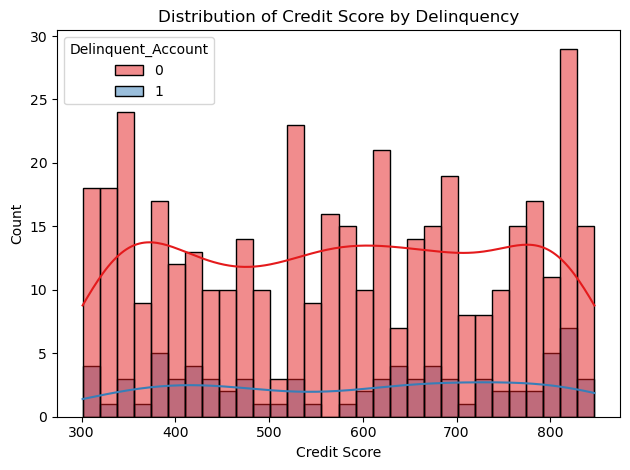

In [32]:
#Distribution of Credit Score by Delinquency
plt.figure()
sns.histplot(data=df, x="Credit_Score", hue="Delinquent_Account", bins=30, kde=True, palette="Set1")
plt.title("Distribution of Credit Score by Delinquency")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

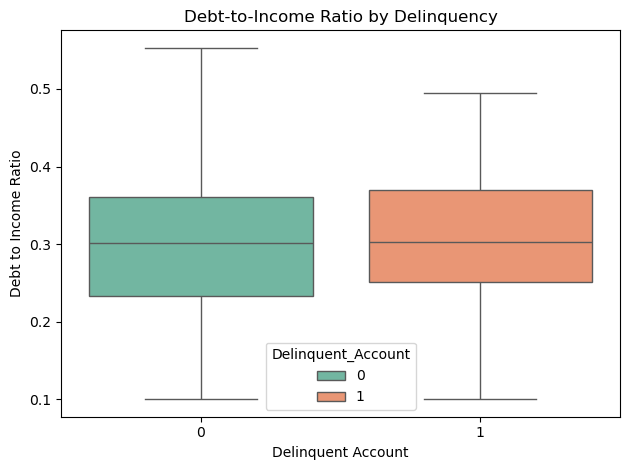

In [34]:
#Debt to Income Ratio vs. Delinquency
plt.figure()
sns.boxplot(data=df, x="Delinquent_Account", y="Debt_to_Income_Ratio",hue="Delinquent_Account", palette="Set2")
plt.title("Debt-to-Income Ratio by Delinquency")
plt.xlabel("Delinquent Account")
plt.ylabel("Debt to Income Ratio")
plt.tight_layout()
plt.show()

#Step 3: Detect Patterns and Risk Factors

In [ ]:
# Encode payment history (categorical) into numeric scores
# On-time = 0, Late = 1, Missed = 2
payment_mapping = {'On-time': 0, 'Late': 1, 'Missed': 2}
payment_columns = ['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']

# Apply mapping to each month's payment status
for col in payment_columns:
    df[col] = df[col].map(payment_mapping)

In [ ]:
# Create an average score for payment behavior
# Higher scores = more missed/late payments
df['Avg_Payment_Score'] = df[payment_columns].mean(axis=1)

In [ ]:
# Calculate correlation of all numeric features with the target
correlation_with_target = df.corr(numeric_only=True)['Delinquent_Account'].sort_values(ascending=False)

# Display top correlated features
print("Top variables correlated with Delinquent_Account:\n")
print(correlation_with_target)

Top variables correlated with Delinquent_Account:

Delinquent_Account      1.000000
Month_4                 0.060377
Income                  0.043991
Credit_Score            0.034733
Debt_to_Income_Ratio    0.034386
Credit_Utilization      0.034224
Age                     0.022508
Month_3                 0.014217
Loan_Balance           -0.005438
Avg_Payment_Score      -0.014806
Month_6                -0.015360
Month_2                -0.021050
Missed_Payments        -0.026478
Month_5                -0.032708
Month_1                -0.039127
Account_Tenure         -0.039829
Name: Delinquent_Account, dtype: float64


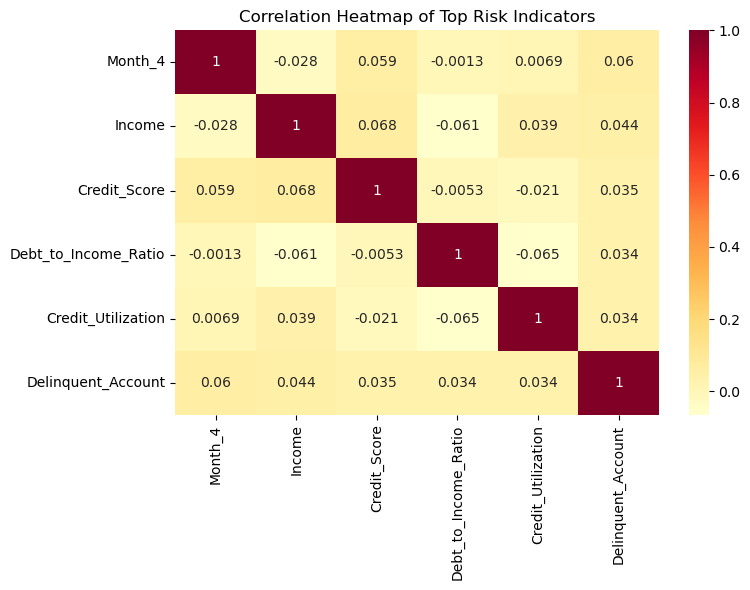

In [31]:
#Visualize correlation heatmap of top risk factors
top_factors = correlation_with_target.drop('Delinquent_Account').head(5).index.tolist()

plt.figure(figsize=(8, 6))
sns.heatmap(df[top_factors + ['Delinquent_Account']].corr(), annot=True, cmap='YlOrRd')
plt.title("Correlation Heatmap of Top Risk Indicators")
plt.tight_layout()
plt.show()

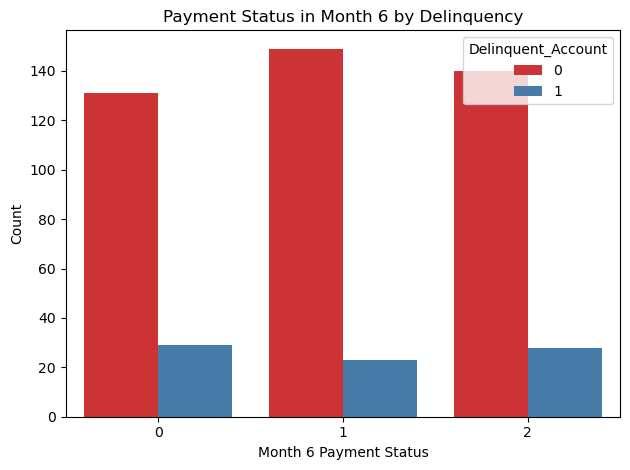

In [35]:
#Payment History Breakdown for Month_6
plt.figure()
sns.countplot(data=df, x="Month_6", hue="Delinquent_Account", palette="Set1")
plt.title("Payment Status in Month 6 by Delinquency")
plt.xlabel("Month 6 Payment Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()